In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#pip install git+https://github.com/StatMixedML/XGBoostLSS.git

  Cloning https://github.com/StatMixedML/XGBoostLSS.git to /tmp/pip-req-build-wtoui1o8
  Running command git clone --filter=blob:none --quiet https://github.com/StatMixedML/XGBoostLSS.git /tmp/pip-req-build-wtoui1o8
  Resolved https://github.com/StatMixedML/XGBoostLSS.git to commit efdc0d4f8024c9e8c31df318ac9bb5e82b0c3c80
  Preparing metadata (setup.py) ... done


In [ ]:
#pip install git+https://github.com/dsgibbons/shap.git

  Cloning https://github.com/dsgibbons/shap.git to /tmp/pip-req-build-o3y3v7mp
  Running command git clone --filter=blob:none --quiet https://github.com/dsgibbons/shap.git /tmp/pip-req-build-o3y3v7mp
  Resolved https://github.com/dsgibbons/shap.git to commit b9f29ccff43dc704428608645065ad740d84d653
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboostlss 0.4.0 requires numpy~=1.24.3, but you have numpy 1.23.5 which is incompatible.


In [ ]:
from xgboostlss.model import *
from xgboostlss.distributions.Gaussian import *
from xgboostlss.datasets.data_loader import load_simulated_gaussian_data
from scipy.stats import norm
import multiprocessing
import plotnine
from plotnine import *
plotnine.options.figure_size = (12, 8)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset_2/tfidf_embeddings_2.csv")
data

,Unnamed: 0.1,Unnamed: 0,00,000,007alisohrab,01,01ktomrf8d,02,02wy1o2fhq,0478zr0xwu,...,ड़क,ड़त,ड़न,फ़टक,फ़र,०स,३०७,५००,७त,Labels
0,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake
1,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake
2,9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake
3,13,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake
4,14,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2479,2479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake
996,2480,2480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake
997,2482,2482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,defamation
998,2483,2483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,defamation


In [ ]:
X=data.drop("Labels", axis=1)
y=data["Labels"]


In [ ]:
y.shape

(1000,)

In [ ]:
y[1]

'fake'

In [ ]:
for i in range(1000):
  if y[i] == 'fake':
    y[i] = 1
  else:
    y[i] = 0

<ipython-input-10-13139b8d3934>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-10-13139b8d3934>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-10-13139b8d3934>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-10-13139b8d3934>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    0
998    0
999    1
Name: Labels, Length: 1000, dtype: object


In [ ]:
y=y.astype(str).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=42,shuffle = True)


In [ ]:
n_cpu = multiprocessing.cpu_count()

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train, nthread=n_cpu)
dtest = xgb.DMatrix(X_test, nthread=n_cpu)

In [ ]:
xgblss = XGBoostLSS(
    Gaussian(stabilization="None",
             response_fn="exp",
             loss_fn="nll"
            )
)


In [ ]:
param_dict = {
    "eta":              ["float", {"low": 1e-5,   "high": 1,     "log": True}],
    "max_depth":        ["int",   {"low": 1,      "high": 10,    "log": False}],
    "gamma":            ["float", {"low": 1e-8,   "high": 40,    "log": True}],
    "subsample":        ["float", {"low": 0.2,    "high": 1.0,   "log": False}],
    "colsample_bytree": ["float", {"low": 0.2,    "high": 1.0,   "log": False}],
    "min_child_weight": ["float", {"low": 1e-8,   "high": 500,   "log": True}],
    "booster":          ["categorical", ["gbtree"]]
}

np.random.seed(123)
opt_param = xgblss.hyper_opt(param_dict,
                             dtrain,
                             num_boost_round=100,        # Number of boosting iterations.
                             nfold=5,                    # Number of cv-folds.
                             early_stopping_rounds=20,   # Number of early-stopping rounds
                             max_minutes=10,             # Time budget in minutes, i.e., stop study after the given number of minutes.
                             n_trials=30 ,               # The number of trials. If this argument is set to None, there is no limitation on the number of trials.
                             silence=True,               # Controls the verbosity of the trail, i.e., user can silence the outputs of the trail.
                             seed=123,                   # Seed used to generate cv-folds.
                             hp_seed=123                 # Seed for random number generator used in the Bayesian hyperparameter search.
                            )

  0%|          | 0/30 [00:00<?, ?it/s]


Hyper-Parameter Optimization successfully finished.
  Number of finished trials:  6
  Best trial:
    Value: 92.6122696
    Params: 
    eta: 0.030363087280807707
    max_depth: 3
    gamma: 1.5074442732613943e-06
    subsample: 0.6410518152663129
    colsample_bytree: 0.7755751758284506
    min_child_weight: 0.00033635921133357536
    booster: gbtree
    opt_rounds: 44


In [ ]:
np.random.seed(123)

opt_params = opt_param.copy()
n_rounds = opt_params["opt_rounds"]
del opt_params["opt_rounds"]

# Train Model with optimized hyperparameters
xgblss.train(opt_params,
             dtrain,
             num_boost_round=n_rounds
             )

In [ ]:
# Set seed for reproducibility
torch.manual_seed(123)

# Number of samples to draw from predicted distribution
n_samples = 1000
quant_sel = [0.05, 0.95] # Quantiles to calculate from predicted distribution

# Sample from predicted distribution
pred_samples = xgblss.predict(dtest,
                              pred_type="samples",
                              n_samples=n_samples,
                              seed=123)

# Calculate quantiles from predicted distribution
pred_quantiles = xgblss.predict(dtest,
                                pred_type="quantiles",
                                n_samples=n_samples,
                                quantiles=quant_sel)

# Return predicted distributional parameters
pred_params = xgblss.predict(dtest,
                             pred_type="parameters")

In [ ]:
pred_samples

,y_sample0,y_sample1,y_sample2,y_sample3,y_sample4,y_sample5,y_sample6,y_sample7,y_sample8,y_sample9,...,y_sample990,y_sample991,y_sample992,y_sample993,y_sample994,y_sample995,y_sample996,y_sample997,y_sample998,y_sample999
0,0.602114,-0.129206,0.775534,0.722489,0.395360,1.438111,-0.062063,-0.076618,-0.383095,0.862609,...,0.514964,0.036291,0.100182,0.245028,0.467332,0.032311,0.268814,0.574428,0.816205,-0.061956
1,0.495014,1.442290,0.729559,0.285118,0.516443,-0.031769,0.887179,0.772609,0.231761,0.404756,...,0.893162,0.724844,1.052338,0.728195,0.976522,0.513706,1.202099,1.086277,0.204675,0.696090
2,0.290287,1.288298,-0.117691,-0.871584,0.089491,0.455109,0.275322,0.646681,0.721402,0.584129,...,0.572760,1.267694,0.993645,0.079195,-0.253445,1.126782,0.761291,0.629372,0.560472,0.545496
3,0.116548,0.297429,0.141795,0.279128,0.533826,0.490273,0.130781,0.200403,0.532224,0.958333,...,1.238045,0.341175,0.764768,0.690226,0.512314,0.172192,0.158803,0.414343,0.064957,0.638743
4,0.724996,0.754550,0.403394,0.122910,1.297130,0.884982,1.283830,0.401214,-0.181822,0.063463,...,-0.124962,0.205458,0.282984,0.367579,1.239498,0.536543,1.214015,0.162504,0.372835,0.001520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.594738,0.172023,0.275490,0.931327,0.449110,0.580845,1.255283,0.921697,0.306193,0.374449,...,1.158991,0.610416,1.264634,0.483445,0.914761,0.649475,0.086437,-0.057780,-0.261513,0.384815
326,-0.226569,-0.335346,0.089115,0.206322,0.606944,1.290644,-0.546935,-0.152826,0.342009,0.296733,...,0.602332,0.640085,0.033827,-0.121293,0.540852,0.281834,-0.048730,0.487503,-0.359127,1.349159
327,-0.210084,0.213764,0.322539,0.632052,0.711621,0.810724,1.196526,0.214958,-0.629684,-0.485607,...,0.805193,0.578356,0.067036,0.646666,0.577593,0.858023,0.022143,-0.207956,0.630558,0.056209
328,0.682265,0.812438,0.520710,0.820606,-0.090061,1.136317,-0.253144,0.589303,0.635442,0.350102,...,0.998834,0.400953,0.992496,0.842668,0.541789,0.303569,1.076218,0.536182,0.126116,0.208748


In [ ]:
pred_quantiles

,quant_0.05,quant_0.95
0,-0.327676,1.151685
1,-0.186660,1.380983
2,-0.315951,1.213681
3,-0.347556,1.223477
4,-0.274462,1.376731
...,...,...
325,-0.361090,1.247899
326,-0.246247,1.354434
327,-0.295557,1.293948
328,-0.370106,1.221721


In [ ]:
pred_params

,loc,scale
0,0.439010,0.483458
1,0.580921,0.483227
2,0.437629,0.485431
3,0.400522,0.482939
4,0.555772,0.485431
...,...,...
325,0.436706,0.483991
326,0.540390,0.485858
327,0.466514,0.483458
328,0.420137,0.481323


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(pred_params, *['loc'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(pred_params, *['scale'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(pred_params, *['loc'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(pred_params, *['scale'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(pred_params, *[[['loc', 'scale']]], **{})
chart

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2330 (\N{DEVANAGARI LETTER CA}) missing from current font.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2361 (\N{DEVANA

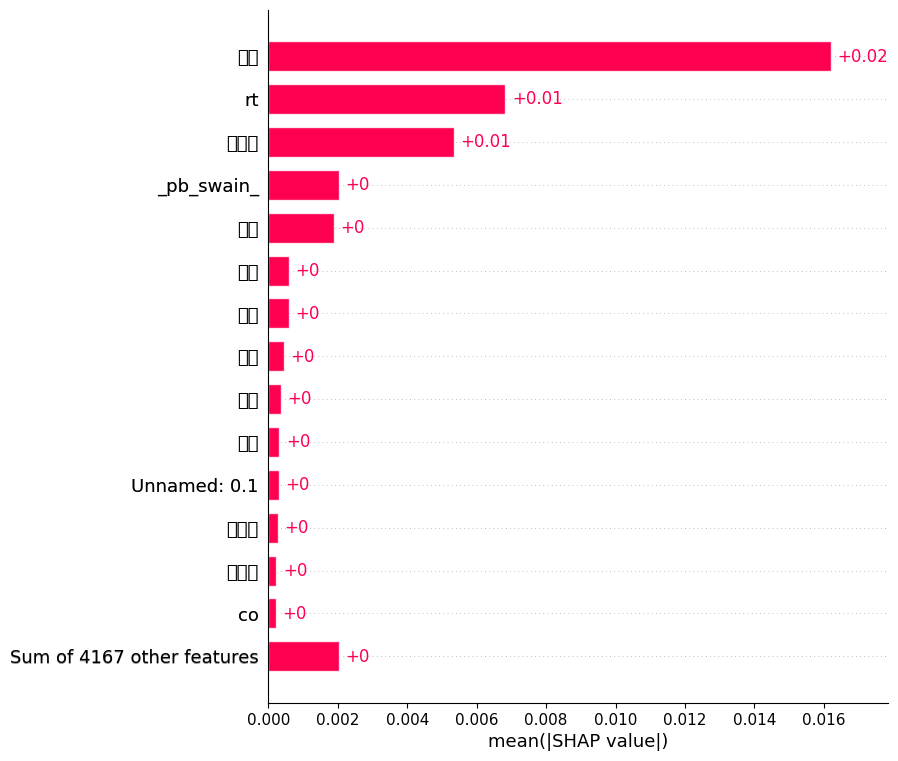

In [ ]:
|# Feature Importance of scale parameter
xgblss.plot(X_test,
            parameter="scale",
            plot_type="Feature_Importance")